In [10]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'cdb636ee-80bb-41ea-86a7-b4530aee2d00',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-05-17T13:31:11.477Z', 'error_code': 0, 'error_message': None, 'elapsed': 25, 'credit_count': 1, 'notice': None, 'total_count': 9966}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11047, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [11]:
type(data)

dict

In [22]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [13]:
df=pd.json_normalize(data['data'])
df['timestamp']=pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11047,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.969958e+07,1.969958e+07,False,NaN,1,NaN,NaN,None,2024-05-17T13:29:00.000Z,66326.865114,2.984112e+10,-22.9442,-0.062179,0.548672,5.541420,6.290034,-2.286064,28.985627,1.306611e+12,54.2855,1.392864e+12,None,2024-05-17T13:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 13:31:19.988931
1,1027,Ethereum,ETH,ethereum,8938,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201203e+08,1.201203e+08,True,NaN,2,NaN,NaN,None,2024-05-17T13:28:00.000Z,3071.284777,1.450684e+10,-0.9970,1.090558,3.221303,1.725271,0.987766,-13.467282,11.222430,3.689237e+11,15.3276,3.689237e+11,None,2024-05-17T13:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 13:31:19.988931
2,825,Tether USDt,USDT,tether,85794,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.112055e+11,1.140866e+11,True,NaN,3,NaN,NaN,None,2024-05-17T13:28:00.000Z,1.000010,5.863842e+10,-18.6157,-0.055716,-0.039698,0.007871,-0.063244,0.108691,-0.037526,1.112066e+11,4.6203,1.140877e+11,None,2024-05-17T13:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-17 13:31:19.988931
3,1839,BNB,BNB,bnb,2162,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475865e+08,1.475865e+08,False,NaN,4,NaN,NaN,None,2024-05-17T13:28:00.000Z,579.254213,1.671248e+09,-17.9054,0.341591,0.638918,-2.600861,7.822598,4.223437,62.580122,8.549008e+10,3.5518,8.549008e+10,None,2024-05-17T13:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 13:31:19.988931
4,5426,Solana,SOL,solana,660,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.488020e+08,5.761677e+08,True,NaN,5,NaN,NaN,None,2024-05-17T13:28:00.000Z,167.729056,3.507007e+09,-12.8864,0.386946,4.233321,9.902010,25.751530,-18.128952,56.775855,7.527714e+10,3.1275,9.664006e+10,None,2024-05-17T13:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 13:31:19.988931
5,3408,USDC,USDC,usd-coin,19181,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.331824e+10,3.331824e+10,False,NaN,6,NaN,NaN,None,2024-05-17T13:28:00.000Z,0.999980,6.614750e+09,-18.4570,0.002851,-0.027479,-0.002471,-0.011277,-0.048980,-0.010555,3.331759e+10,1.3842,3.331759e+10,None,2024-05-17T13:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-17 13:31:19.988931
6,52,XRP,XRP,xrp,1316,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.528895e+10,9.998761e+10,False,NaN,7,NaN,NaN,None,2024-05-17T13:29:00.000Z,0.522632,1.102543e+09,-6.8112,0.004790,1.392667,2.043844,6.491382,-13.326210,-5.014387,2.889579e+10,1.2005,5.226324e+10,None,2024-05-17T13:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 13:31:19.988931
7,11419,Toncoin,TON,toncoin,329,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.474221e+09,5.106705e+09,True,NaN,8,3.414167e+09,2.269116e+10,None,2024-05-17T13:28:00.000Z,6.646179,5.387788e+08,-18.3343,-0.310301,-0.444670,-4.825301,7.350766,74.771673,204.238824,2.309030e+10,0.9593,3.394008e+10,None,2024-05-17T13:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 13:31:19.988931
8,74,Dogecoin,DOGE,dogecoin,965,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me..

In [26]:
def api_runner():
    global df
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
    }
    headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': 'cdb636ee-80bb-41ea-86a7-b4530aee2d00',
    }
    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
    
    df2=pd.json_normalize(data['data'])
    df2['timestamp']=pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'D:\google\PortfolioProject\API.csv'):
        df.to_csv(r'D:\google\PortfolioProject\API.csv',header='Column_names')
    else:
        df.to_csv(r'D:\google\PortfolioProject\API.csv',mode='a',header=False)

In [17]:
import os
from time import time
from time import sleep

In [28]:
for i in range(333):
    api_runner()
    print('API runner completed')
    sleep(60)#sleep 
exit()

API runner completed
API runner completed


KeyboardInterrupt: 

In [29]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11047,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.969958e+07,1.969958e+07,False,NaN,1,NaN,NaN,None,2024-05-17T13:29:00.000Z,66326.865114,2.984112e+10,-22.9442,-0.062179,0.548672,5.541420,6.290034,-2.286064,28.985627,1.306611e+12,54.2855,1.392864e+12,None,2024-05-17T13:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 13:31:19.988931
1,1027,Ethereum,ETH,ethereum,8938,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201203e+08,1.201203e+08,True,NaN,2,NaN,NaN,None,2024-05-17T13:28:00.000Z,3071.284777,1.450684e+10,-0.9970,1.090558,3.221303,1.725271,0.987766,-13.467282,11.222430,3.689237e+11,15.3276,3.689237e+11,None,2024-05-17T13:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 13:31:19.988931
2,825,Tether USDt,USDT,tether,85794,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.112055e+11,1.140866e+11,True,NaN,3,NaN,NaN,None,2024-05-17T13:28:00.000Z,1.000010,5.863842e+10,-18.6157,-0.055716,-0.039698,0.007871,-0.063244,0.108691,-0.037526,1.112066e+11,4.6203,1.140877e+11,None,2024-05-17T13:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-17 13:31:19.988931
3,1839,BNB,BNB,bnb,2162,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475865e+08,1.475865e+08,False,NaN,4,NaN,NaN,None,2024-05-17T13:28:00.000Z,579.254213,1.671248e+09,-17.9054,0.341591,0.638918,-2.600861,7.822598,4.223437,62.580122,8.549008e+10,3.5518,8.549008e+10,None,2024-05-17T13:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 13:31:19.988931
4,5426,Solana,SOL,solana,660,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.488020e+08,5.761677e+08,True,NaN,5,NaN,NaN,None,2024-05-17T13:28:00.000Z,167.729056,3.507007e+09,-12.8864,0.386946,4.233321,9.902010,25.751530,-18.128952,56.775855,7.527714e+10,3.1275,9.664006e+10,None,2024-05-17T13:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 13:31:19.988931
5,3408,USDC,USDC,usd-coin,19181,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.331824e+10,3.331824e+10,False,NaN,6,NaN,NaN,None,2024-05-17T13:28:00.000Z,0.999980,6.614750e+09,-18.4570,0.002851,-0.027479,-0.002471,-0.011277,-0.048980,-0.010555,3.331759e+10,1.3842,3.331759e+10,None,2024-05-17T13:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-17 13:31:19.988931
6,52,XRP,XRP,xrp,1316,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.528895e+10,9.998761e+10,False,NaN,7,NaN,NaN,None,2024-05-17T13:29:00.000Z,0.522632,1.102543e+09,-6.8112,0.004790,1.392667,2.043844,6.491382,-13.326210,-5.014387,2.889579e+10,1.2005,5.226324e+10,None,2024-05-17T13:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 13:31:19.988931
7,11419,Toncoin,TON,toncoin,329,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.474221e+09,5.106705e+09,True,NaN,8,3.414167e+09,2.269116e+10,None,2024-05-17T13:28:00.000Z,6.646179,5.387788e+08,-18.3343,-0.310301,-0.444670,-4.825301,7.350766,74.771673,204.238824,2.309030e+10,0.9593,3.394008e+10,None,2024-05-17T13:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 13:31:19.988931
8,74,Dogecoin,DOGE,dogecoin,965,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me..

In [30]:
df72 = pd.read_csv(r'D:\google\PortfolioProject\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11047,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.969958e+07,1.969958e+07,False,NaN,1,NaN,NaN,NaN,2024-05-17T13:29:00.000Z,66326.865114,2.984112e+10,-22.9442,-0.062179,0.548672,5.541420,6.290034,-2.286064,28.985627,1.306611e+12,54.2855,1.392864e+12,NaN,2024-05-17T13:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 13:31:19.988931
1,1,1027,Ethereum,ETH,ethereum,8938,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201203e+08,1.201203e+08,True,NaN,2,NaN,NaN,NaN,2024-05-17T13:28:00.000Z,3071.284777,1.450684e+10,-0.9970,1.090558,3.221303,1.725271,0.987766,-13.467282,11.222430,3.689237e+11,15.3276,3.689237e+11,NaN,2024-05-17T13:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 13:31:19.988931
2,2,825,Tether USDt,USDT,tether,85794,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.112055e+11,1.140866e+11,True,NaN,3,NaN,NaN,NaN,2024-05-17T13:28:00.000Z,1.000010,5.863842e+10,-18.6157,-0.055716,-0.039698,0.007871,-0.063244,0.108691,-0.037526,1.112066e+11,4.6203,1.140877e+11,NaN,2024-05-17T13:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-17 13:31:19.988931
3,3,1839,BNB,BNB,bnb,2162,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.475865e+08,1.475865e+08,False,NaN,4,NaN,NaN,NaN,2024-05-17T13:28:00.000Z,579.254213,1.671248e+09,-17.9054,0.341591,0.638918,-2.600861,7.822598,4.223437,62.580122,8.549008e+10,3.5518,8.549008e+10,NaN,2024-05-17T13:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 13:31:19.988931
4,4,5426,Solana,SOL,solana,660,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.488020e+08,5.761677e+08,True,NaN,5,NaN,NaN,NaN,2024-05-17T13:28:00.000Z,167.729056,3.507007e+09,-12.8864,0.386946,4.233321,9.902010,25.751530,-18.128952,56.775855,7.527714e+10,3.1275,9.664006e+10,NaN,2024-05-17T13:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 13:31:19.988931
5,5,3408,USDC,USDC,usd-coin,19181,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.331824e+10,3.331824e+10,False,NaN,6,NaN,NaN,NaN,2024-05-17T13:28:00.000Z,0.999980,6.614750e+09,-18.4570,0.002851,-0.027479,-0.002471,-0.011277,-0.048980,-0.010555,3.331759e+10,1.3842,3.331759e+10,NaN,2024-05-17T13:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-17 13:31:19.988931
6,6,52,XRP,XRP,xrp,1316,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.528895e+10,9.998761e+10,False,NaN,7,NaN,NaN,NaN,2024-05-17T13:29:00.000Z,0.522632,1.102543e+09,-6.8112,0.004790,1.392667,2.043844,6.491382,-13.326210,-5.014387,2.889579e+10,1.2005,5.226324e+10,NaN,2024-05-17T13:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 13:31:19.988931
7,7,11419,Toncoin,TON,toncoin,329,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,3.474221e+09,5.106705e+09,True,NaN,8,3.414167e+09,2.269116e+10,NaN,2024-05-17T13:28:00.000Z,6.646179,5.387788e+08,-18.3343,-0.310301,-0.444670,-4.825301,7.350766,74.771673,204.238824,2.309030e+10,0.9593,3.394008e+10,NaN,2024-05-17T13:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 13:31:19.988931
8,8,74,Dogecoin,DOGE,dogecoin,965,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medi

In [31]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [32]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11047,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19699578.00000,19699578.00000,False,nan,1,nan,nan,None,2024-05-17T13:29:00.000Z,66326.86511,29841124969.18952,-22.94420,-0.06218,0.54867,5.54142,6.29003,-2.28606,28.98563,1306611252804.42627,54.28550,1392864167389.41992,None,2024-05-17T13:29:00.000Z,nan,NaN,NaN,NaN,NaN,2024-05-17 13:31:19.988931
1,1027,Ethereum,ETH,ethereum,8938,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",nan,120120311.41094,120120311.41094,True,nan,2,nan,nan,None,2024-05-17T13:28:00.000Z,3071.28478,14506837976.93268,-0.99700,1.09056,3.22130,1.72527,0.98777,-13.46728,11.22243,368923683812.16229,15.32760,368923683812.15997,None,2024-05-17T13:28:00.000Z,nan,NaN,NaN,NaN,NaN,2024-05-17 13:31:19.988931
2,825,Tether USDt,USDT,tether,85794,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",nan,111205483123.85364,114086550454.42137,True,nan,3,nan,nan,None,2024-05-17T13:28:00.000Z,1.00001,58638417472.93847,-18.61570,-0.05572,-0.03970,0.00787,-0.06324,0.10869,-0.03753,111206558983.26099,4.62030,114087654186.77000,None,2024-05-17T13:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-17 13:31:19.988931
3,1839,BNB,BNB,bnb,2162,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",nan,147586461.43289,147586461.43289,False,nan,4,nan,nan,None,2024-05-17T13:28:00.000Z,579.25421,1671247997.95835,-17.90540,0.34159,0.63892,-2.60086,7.82260,4.22344,62.58012,85490079501.41612,3.55180,85490079501.42000,None,2024-05-17T13:28:00.000Z,nan,NaN,NaN,NaN,NaN,2024-05-17 13:31:19.988931
4,5426,Solana,SOL,solana,660,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",nan,448802035.39139,576167671.24951,True,nan,5,nan,nan,None,2024-05-17T13:28:00.000Z,167.72906,3507007158.25340,-12.88640,0.38695,4.23332,9.90201,25.75153,-18.12895,56.77585,75277141596.22296,3.12750,96640059428.41000,None,2024-05-17T13:28:00.000Z,nan,NaN,NaN,NaN,NaN,2024-05-17 13:31:19.988931
5,3408,USDC,USDC,usd-coin,19181,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",nan,33318242238.95878,33318242238.95878,False,nan,6,nan,nan,None,2024-05-17T13:28:00.000Z,0.99998,6614750325.71855,-18.45700,0.00285,-0.02748,-0.00247,-0.01128,-0.04898,-0.01056,33317590413.31404,1.38420,33317590413.31000,None,2024-05-17T13:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-17 13:31:19.988931
6,52,XRP,XRP,xrp,1316,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55288951055.00000,99987612649.00000,False,nan,7,nan,nan,None,2024-05-17T13:29:00.000Z,0.52263,1102542518.59111,-6.81120,0.00479,1.39267,2.04384,6.49138,-13.32621,-5.01439,28895794591.56805,1.20050,52263235312.28000,None,2024-05-17T13:29:00.000Z,nan,NaN,NaN,NaN,NaN,2024-05-17 13:31:19.988931
7,11419,Toncoin,TON,toncoin,329,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",nan,3474221409.45838,5106705480.40014,True,nan,8,3414166606.00000,22691161906.79688,None,2024-05-17T13:28:00.000Z,6.64618,538778841.88834,-18.33430,-0.31030,-0.44467,-4.82530,7.35077,74.77167,204.23882,23090296871.72803,0.95930,33940077986.37000,None,2024-05-1

In [33]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.15201,0.33631,6.00875,6.99920,-1.60931,29.55742
Ethereum,0.15529,3.51738,2.43410,2.36547,-13.04572,11.93711
Tether USDt,0.00156,-0.00618,0.03276,-0.02470,0.13863,-0.00493
BNB,-0.03155,0.62256,-2.46610,8.66296,4.17580,63.74867
Solana,-0.33676,3.44184,10.44620,27.22405,-18.10696,56.59912
USDC,0.00489,0.01042,0.01140,0.01292,-0.00783,0.01366
XRP,-0.15237,1.30310,2.46766,7.06237,-13.30666,-4.66167
Toncoin,-0.17518,-0.06359,-3.26870,8.78975,75.79224,204.17088
Dogecoin,-0.22066,0.38641,2.80211,1.62800,5.99590,83.37550


In [34]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.15201
             quote.USD.percent_change_24h     0.33631
             quote.USD.percent_change_7d      6.00875
             quote.USD.percent_change_30d     6.99920
             quote.USD.percent_change_60d    -1.60931
             quote.USD.percent_change_90d    29.55742
Ethereum     quote.USD.percent_change_1h      0.15529
             quote.USD.percent_change_24h     3.51738
             quote.USD.percent_change_7d      2.43410
             quote.USD.percent_change_30d     2.36547
             quote.USD.percent_change_60d   -13.04572
             quote.USD.percent_change_90d    11.93711
Tether USDt  quote.USD.percent_change_1h      0.00156
             quote.USD.percent_change_24h    -0.00618
             quote.USD.percent_change_7d      0.03276
             quote.USD.percent_change_30d    -0.02470
             quote.USD.percent_change_60d     0.13863
             quote.USD.percent_change_90

In [35]:
type(df4)

pandas.core.series.Series

In [37]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.15201
            quote.USD.percent_change_24h   0.33631
            quote.USD.percent_change_7d    6.00875
            quote.USD.percent_change_30d   6.99920
            quote.USD.percent_change_60d  -1.60931
            quote.USD.percent_change_90d  29.55742
Ethereum    quote.USD.percent_change_1h    0.15529
            quote.USD.percent_change_24h   3.51738
            quote.USD.percent_change_7d    2.43410
            quote.USD.percent_change_30d   2.36547
            quote.USD.percent_change_60d -13.04572
            quote.USD.percent_change_90d  11.93711
Tether USDt quote.USD.percent_change_1h    0.00156
            quote.USD.percent_change_24h  -0.00618
            quote.USD.percent_change_7d    0.03276
            quote.USD.percent_change_30d  -0.02470
            quote.USD.percent_change_60d   0.13863
            quote.USD.percent_change_90d  -0.00493
BNB         quote.USD.percent_change_1h   -0.03155
            quote.USD.percent_change_24h   0.62256
            quote.USD.percent_change_7d   -2.46610
            quote.USD.percent_change_30d   8.66296
            quote.USD.percent_change_60d   4.17580
            quote.USD.percent_change_90d  63.74867
Solana      quote.USD.percent_change_1h   -0.33676
            quote.USD.percent_change_24h   3.44184
            quote.USD.percent_change_7d   10.44620
            quote.USD.percent_change_30d  27.22405
            quote.USD.percent_change_60d -18.10696
            quote.USD.percent_change_90d  56.59912
USDC        quote.USD.percent_change_1h    0.00489
            quote.USD.percent_change_24h   0.01042
            quote.USD.percent_change_7d    0.01140
            quote.USD.percent_change_30d   0.01292
            quote.USD.percent_change_60d  -0.00783
            quote.USD.percent_change_90d   0.01366
XRP         quote.USD.percent_change_1h   -0.15237
            quote.USD.percent_change_24h   1.30310
            quote.USD.percent_change_7d    2.46766
            quote.USD.percent_change_30d   7.06237
            quote.USD.percent_change_60d -13.30666
            quote.USD.percent_change_90d  -4.66167
Toncoin     quote.USD.percent_change_1h   -0.17518
            quote.USD.percent_change_24h  -0.06359
            quote.USD.percent_change_7d   -3.26870
            quote.USD.percent_change_30d   8.78975
            quote.USD.percent_change_60d  75.79224
            quote.USD.percent_change_90d 204.17088
Dogecoin    quote.USD.percent_change_1h   -0.22066
            quote.USD.percent_change_24h   0.38641
            quote.USD.percent_change_7d    2.80211
            quote.USD.percent_change_30d   1.62800
            quote.USD.percent_change_60d   5.99590
            quote.USD.percent_change_90d  83.37550
Cardano     quote.USD.percent_change_1h   -0.78170
            quote.USD.percent_change_24h   6.13876
            quote.USD.percent_change_7d    4.49766
            quote.USD.percent_change_30d   8.70374
            quote.USD.percent_change_60d -27.44466
            quote.USD.percent_change_90d -16.89887
Shiba Inu   quote.USD.percent_change_1h   -0.23444
            quote.USD.percent_change_24h   1.19083
            quote.USD.percent_change_7d    7.73428
            quote.USD.percent_change_30d  14.04990
            quote.USD.percent_change_60d  -9.02084
            quote.USD.percent_change_90d 160.28686
Avalanche   quote.USD.percent_change_1h   -0.17338
            quote.USD.percent_change_24h   6.73440
            quote.USD.percent_change_7d    3.78773
            quote.USD.percent_change_30d   9.87693
            quote.USD.percent_change_60d -40.71657
            quote.USD.percent_change_90d  -5.95088
TRON        quote.USD.percent_change_1h   -0.02549
            quote.USD.percent_change_24h  -0.30729
            quote.USD.percent_change_7d   -0.94539
            quote.USD.percent_change_30d  12.39670
            quote.USD.percent_change_60d   0.11879
            quo

In [38]:
df5.count()

values    90
dtype: int64

In [39]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. We can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.set_index(index)
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,values
0,-0.15201
1,0.33631
2,6.00875
3,6.99920
4,-1.60931
5,29.55742
6,0.15529
7,3.51738
8,2.43410
9,2.36547


In [41]:
df6=df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.15201
1,Bitcoin,quote.USD.percent_change_24h,0.33631
2,Bitcoin,quote.USD.percent_change_7d,6.00875
3,Bitcoin,quote.USD.percent_change_30d,6.99920
4,Bitcoin,quote.USD.percent_change_60d,-1.60931
5,Bitcoin,quote.USD.percent_change_90d,29.55742
6,Ethereum,quote.USD.percent_change_1h,0.15529
7,Ethereum,quote.USD.percent_change_24h,3.51738
8,Ethereum,quote.USD.percent_change_7d,2.43410
9,Ethereum,quote.USD.percent_change_30d,2.36547


In [42]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.15201
1,Bitcoin,quote.USD.percent_change_24h,0.33631
2,Bitcoin,quote.USD.percent_change_7d,6.00875
3,Bitcoin,quote.USD.percent_change_30d,6.99920
4,Bitcoin,quote.USD.percent_change_60d,-1.60931
5,Bitcoin,quote.USD.percent_change_90d,29.55742
6,Ethereum,quote.USD.percent_change_1h,0.15529
7,Ethereum,quote.USD.percent_change_24h,3.51738
8,Ethereum,quote.USD.percent_change_7d,2.43410
9,Ethereum,quote.USD.percent_change_30d,2.36547


In [46]:
#df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h'],['1d'])
df7

,name,percent_change,values
0,Bitcoin,1d,-0.15201
1,Bitcoin,24h,0.33631
2,Bitcoin,7d,6.00875
3,Bitcoin,30d,6.99920
4,Bitcoin,60d,-1.60931
5,Bitcoin,90d,29.55742
6,Ethereum,1d,0.15529
7,Ethereum,24h,3.51738
8,Ethereum,7d,2.43410
9,Ethereum,30d,2.36547


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

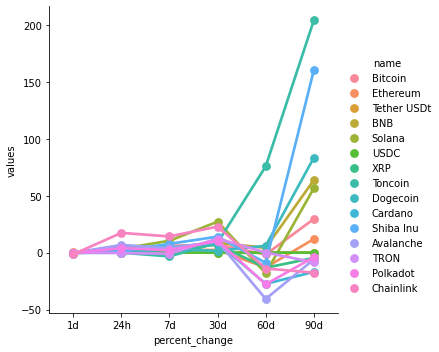

In [47]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [48]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,66326.86511,2024-05-17 13:31:19.988931
0,Bitcoin,66034.69888,2024-05-17 13:55:00.585170
0,Bitcoin,66016.30578,2024-05-17 13:56:01.444640
0,Bitcoin,66022.04611,2024-05-17 13:57:02.513933
0,Bitcoin,66367.28233,2024-05-17 14:30:51.798936
0,Bitcoin,66367.28233,2024-05-17 14:31:52.606041
0,Bitcoin,66476.30918,2024-05-17 14:32:53.113482
0,Bitcoin,66471.66884,2024-05-17 14:33:53.642216
0,Bitcoin,66438.68607,2024-05-17 14:34:54.669347


In [51]:
df10 = df10.reset_index(drop=True)
df10

,name,quote.USD.price,timestamp
0,Bitcoin,66326.86511,2024-05-17 13:31:19.988931
1,Bitcoin,66034.69888,2024-05-17 13:55:00.585170
2,Bitcoin,66016.30578,2024-05-17 13:56:01.444640
3,Bitcoin,66022.04611,2024-05-17 13:57:02.513933
4,Bitcoin,66367.28233,2024-05-17 14:30:51.798936
5,Bitcoin,66367.28233,2024-05-17 14:31:52.606041
6,Bitcoin,66476.30918,2024-05-17 14:32:53.113482
7,Bitcoin,66471.66884,2024-05-17 14:33:53.642216
8,Bitcoin,66438.68607,2024-05-17 14:34:54.669347


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

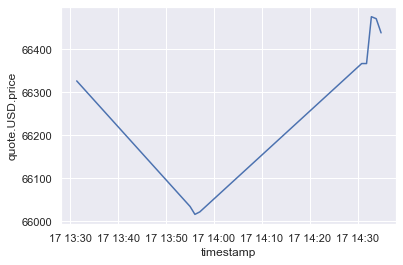

In [52]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)